# Youtube

This notebook highlights the basics of gathering data about YouTube videos, including collecting details about the video, such as title, description, and view count;  extracting the video transcription or captions; and storing the video file locally. It also covers working with playlists.

The most versatile library for working with YouTube videos in Python in [pytube](https://python-pytube.readthedocs.io/en/latest/). You can install it in terminal with `pip install pytube` or, from within a Jupyter Notebook, `%pip install pytube`. 

This overview is aimed at those who will be collecting data from YouTube for social science research. Review the [documentation] for pytube's full capabilities and greater depth on each topic. 

##  Video metadata

pytube can access information about a specific video, such as title, description, and view count. After importing, you provide the function with the the full url of the video. In this case, I'll be looking at the [first video](https://www.youtube.com/watch?v=YnCJU6PaCio) in the Crash Course Sociology series.  

In [1]:
from pytube import YouTube

yt = YouTube('https://www.youtube.com/watch?v=YnCJU6PaCio')

The YouTube object `yt` has all the metadata stored as methods, which can be accessed by name.

In [2]:
yt.title

'What Is Sociology?: Crash Course Sociology #1'

Most likely, you'll want to extract the information from the video for later analysis. A convenient way to store data on a specific video is as a pandas series, which outputs fairly nicely and can be aggregated into pandas dataframes for analysis in Python or export to other file formats. In my `extract_meta` function, I pull out the most relevant metadata for analysis. I also add the current time since the data, particularly the view count, changes over time. 

In [3]:
import pandas as pd
from datetime import datetime

def extract_meta(yt):
    properties = [
        "author",
        "title",
        "length",
        "publish_date",
        "keywords",
        "watch_url",
        "thumbnail_url",
        "description",
        "views",
    ]
    m = {p: getattr(yt, p) for p in properties}
    m['Download Time'] = now = datetime.now()
    return pd.Series(m)

Before printing the video's information, I expand the pandas' column width display to present more information without truncation.

In [4]:
pd.set_option("max_colwidth", 80)

extract_meta(yt)

author                                                                               CrashCourse
title                                              What Is Sociology?: Crash Course Sociology #1
length                                                                                       581
publish_date                                                                 2017-03-13 00:00:00
keywords         [John Green, Hank Green, vlogbrothers, Crash Course, crashcourse, education,...
watch_url                                                https://youtube.com/watch?v=YnCJU6PaCio
thumbnail_url                               https://i.ytimg.com/vi/YnCJU6PaCio/maxresdefault.jpg
description      Today we kick off Crash Course Sociology by explaining what exactly sociolog...
views                                                                                    2242224
Download Time                                                         2020-11-23 07:44:24.369497
dtype: object

## Downloading the video

You can also download the video. pytube has many video choices depending on the resolution you want, but the simplest option is to grab the highest quality video.  

Providing a filename and location is optional. By default, the video is stored in the current directory using the video title as the filename. I'm storing it using the YouTube file id (the part after `v=` in the video's url) in the command below.

In [5]:
yt.streams.get_highest_resolution().download(filename="YnCJU6PaCio")

'/Users/nealcaren/Documents/nlp/YnCJU6PaCio.mp4'

This ten-minute video takes up about 42MB on my hard drive and took almost 30 seconds to download. Conveniently the video will not be redownloaded if it already exists where pytube is trying to store it.

You can confirm that the download worked by playing it in your notebook.

In [6]:
from IPython.display import Video

Video('YnCJU6PaCio.mp4')

## Captions

Almost all YouTube videos either have captions provided by the uploader or an automated transcription, usually in several languages. The texts aren't downloaded automatically. If the video has user-uploaded captions in English, you can use the `en` language code. Altenatively, to access the English transcription, use the `a.en` lanague code. If you are interetested in seeing all the captions availble for a specific video, `yt.captions.all()` will return a list of the languages and codes.

The captions are provided in an XML file, and pytube has a function for producing a more readable srt version, the common subtitle/caption formatting.



In [7]:
caption = yt.captions['en']
print(caption.generate_srt_captions())

1
00:00:00,000 --> 00:00:02,580
Hello, I’m Nicole Sweeney and I have a question for you:

2
00:00:02,580 --> 00:00:04,480
Have you ever wondered how the world works?

3
00:00:04,480 --> 00:00:08,620
I’m not talking about atoms and molecules, or wave functions and chemical reactions;

4
00:00:08,620 --> 00:00:10,240
I mean the world of people.

5
00:00:10,240 --> 00:00:13,320
For example, have you ever wondered who goes to college, and why?

6
00:00:13,320 --> 00:00:15,400
What is it that makes people march in the streets?

7
00:00:15,400 --> 00:00:18,220
How do you know to raise your hand in math class, but not at the dinner table?

8
00:00:18,220 --> 00:00:22,900
Why do some people like Broadway musicals, and some people like hip-hop, and some people like both?

9
00:00:22,900 --> 00:00:27,320
Well, we're gonna find out about all of that stuff and so so much more.

10
00:00:27,320 --> 00:00:28,840
Especially, you!

11
00:00:28,840 --> 00:00:34,120
You’re going to learn about you, and 

To make things a little more useful for analysis, I modified pytube's `generate_srt_captions` function to return the entire caption text in one string.

In [8]:
from xml.etree import ElementTree
from html import unescape


def ytcaption_to_string(caption_object):
    """Convert caption object to string."""
    xml_captions = caption.xml_captions
    segments = []
    root = ElementTree.fromstring(xml_captions)
    for i, child in enumerate(list(root)):
        text = child.text or ""
        segments.append(text)
    full_text = " ".join(segments)
    full_text = unescape(
        full_text.replace("\n", " ").replace("  ", " "),
    )
    return full_text

In [9]:
ytcaption_to_string(caption)

"Hello, I’m Nicole Sweeney and I have a question for you: Have you ever wondered how the world works? I’m not talking about atoms and molecules, or wave functions and chemical reactions; I mean the world of people. For example, have you ever wondered who goes to college, and why? What is it that makes people march in the streets? How do you know to raise your hand in math class, but not at the dinner table? Why do some people like Broadway musicals, and some people like hip-hop, and some people like both? Well, we're gonna find out about all of that stuff and so so much more. Especially, you! You’re going to learn about you, and your place in the world because this is Crash Course Sociology. [Theme Music] Sociology got its start thanks to a French philosopher named Auguste Comte in the 1800s. He wanted there to be a systematic science for studying society, a way to investigate and solve its basic problems. And while sociology today is very different from what Comte imagined, that’s sti

Depending on what you are doing with the text, it might also be useful to have the caption in a more structured format, such as a pandas dataframe with columns for the start and end times. 

In [10]:
def ytcaption_to_df(caption_object):
    """Convert xml caption to pandas dataframe."""
    xml_captions = caption_object.xml_captions
    segments = []
    root = ElementTree.fromstring(xml_captions)
    for i, child in enumerate(list(root)):
        text = child.text or ""
        caption = unescape(
            text.replace("\n", " ").replace("  ", " "),
        )
        duration = float(child.attrib["dur"])
        start = float(child.attrib["start"])
        end = start + duration
        sequence_number = i + 1  # convert from 0-indexed to 1.
        line = pd.Series(
            {"order": sequence_number, "start": start, "end": end, "text": caption}
        )

        segments.append(line)
    return pd.DataFrame(segments)

In [11]:
ytcaption_to_df(caption).head(10)

,order,start,end,text
0,1,0.00,2.58,"Hello, I’m Nicole Sweeney and I have a question for you:"
1,2,2.58,4.48,Have you ever wondered how the world works?
2,3,4.48,8.62,"I’m not talking about atoms and molecules, or wave functions and chemical re..."
3,4,8.62,10.24,I mean the world of people.
4,5,10.24,13.32,"For example, have you ever wondered who goes to college, and why?"
5,6,13.32,15.40,What is it that makes people march in the streets?
6,7,15.40,18.22,"How do you know to raise your hand in math class, but not at the dinner table?"
7,8,18.22,22.90,"Why do some people like Broadway musicals, and some people like hip-hop, and..."
8,9,22.90,27.32,"Well, we're gonna find out about all of that stuff and so so much more."
9,10,27.32,28.84,"Especially, you!"


## Playlists

If you have the URL of a YouTube playlist, pytube can retrieve a list of the video URLs. In this case, I'm going to look at the entire Crash Course Sociology playlist.

In [12]:
from pytube import Playlist

In [13]:
pl = Playlist(
    "https://www.youtube.com/playlist?list=PL8dPuuaLjXtMJ-AfB_7J1538YKWkZAnGA"
)

Since `pl` is a standard Python list, you can look at the length or looks at the first few items using standard syntax.

In [14]:
display(len(pl))
pl[:3]

45

['https://www.youtube.com/watch?v=ylXVn-wh9eQ',
 'https://www.youtube.com/watch?v=YnCJU6PaCio',
 'https://www.youtube.com/watch?v=DbTt_ySTjaY']

If you have a playlist of interest, you most likely want to gather information on all the videos and perhaps download them. One option would be to loop over each of the playlist video URLs, storing the information and captions in a new list, which can then be converted to pandas dataframe. In the loop below, I've commented out the downloads since I don't need the video files.

In [15]:
video_meta_data = []

for url in pl.video_urls:
    yt = YouTube(url)
    meta = extract_meta(yt)

    # Get English captions using automated transcription if they aren't present
    try:
        caption = yt.captions['en']
    except (AttributeError):
        caption = yt.captions['a.en']
        
    meta["caption"] = ytcaption_to_string(caption.xml_captions)

    # Download video
    # video_id = url.split('=')[-1]
    # meta['video_id'] = video_id
    # yt.streams.get_highest_resolution().download(video_id)

    video_meta_data.append(meta)
df = pd.DataFrame(video_meta_data)

Downloading the metadata and captions for the playlist took me almost two minutes, or approximately 2.5 seconds per video. 

In [16]:
df.sample(3)

,author,title,length,publish_date,keywords,watch_url,thumbnail_url,description,views,Download Time,caption
19,CrashCourse,Theory & Deviance: Crash Course Sociology #19,585,2017-07-24,"[John Green, Hank Green, vlogbrothers, Crash Course, crashcourse, education,...",https://youtube.com/watch?v=06IS_X7hWWI,https://i.ytimg.com/vi/06IS_X7hWWI/maxresdefault.jpg,"Last week we introduced deviance as a concept, but today we’re going return ...",348994,2020-11-23 07:45:14.708954,"As we noted last week, an armed robber and a pacifist have something in comm..."
6,CrashCourse,Karl Marx & Conflict Theory: Crash Course Sociology #6,679,2017-04-17,"[John Green, Hank Green, vlogbrothers, Crash Course, crashcourse, education,...",https://youtube.com/watch?v=gR3igiwaeyc,https://i.ytimg.com/vi/gR3igiwaeyc/maxresdefault.jpg,Today we’ll continue to explore sociology’s founding theorists with a look a...,1448068,2020-11-23 07:44:40.672428,You’ve probably heard of Karl Marx. He's remembered as the father of divisiv...
41,CrashCourse,Schools & Social Inequality: Crash Course Sociology #41,686,2018-01-22,"[John Green, Hank Green, vlogbrothers, Crash Course, crashcourse, education,...",https://youtube.com/watch?v=hYMk3Bk08NA,https://i.ytimg.com/vi/hYMk3Bk08NA/maxresdefault.jpg,"In the second half of our education unit, we’re using conflict theory to exp...",246793,2020-11-23 07:46:08.737541,"We’ve all complained about having to go to school at some point, right? I me..."


A quick analysis of the resulting dataframe shows that it worked and considerably drop off in viewers after the first video.

In [17]:
df.sort_values(by='views', ascending=False).head(5)

,author,title,length,publish_date,keywords,watch_url,thumbnail_url,description,views,Download Time,caption
1,CrashCourse,What Is Sociology?: Crash Course Sociology #1,581,2017-03-13,"[John Green, Hank Green, vlogbrothers, Crash Course, crashcourse, education,...",https://youtube.com/watch?v=YnCJU6PaCio,https://i.ytimg.com/vi/YnCJU6PaCio/maxresdefault.jpg,Today we kick off Crash Course Sociology by explaining what exactly sociolog...,2242224,2020-11-23 07:44:29.365492,"Hello, I’m Nicole Sweeney and I have a question for you: Have you ever wonde..."
6,CrashCourse,Karl Marx & Conflict Theory: Crash Course Sociology #6,679,2017-04-17,"[John Green, Hank Green, vlogbrothers, Crash Course, crashcourse, education,...",https://youtube.com/watch?v=gR3igiwaeyc,https://i.ytimg.com/vi/gR3igiwaeyc/maxresdefault.jpg,Today we’ll continue to explore sociology’s founding theorists with a look a...,1448068,2020-11-23 07:44:40.672428,You’ve probably heard of Karl Marx. He's remembered as the father of divisiv...
2,CrashCourse,Major Sociological Paradigms: Crash Course Sociology #2,579,2017-03-20,"[John Green, Hank Green, vlogbrothers, Crash Course, crashcourse, education,...",https://youtube.com/watch?v=DbTt_ySTjaY,https://i.ytimg.com/vi/DbTt_ySTjaY/maxresdefault.jpg,"This week we introduce sociology’s three major theoretical paradigms, and so...",1083967,2020-11-23 07:44:31.670732,"What’s up with society, exactly? I mean, is it a smoothly functioning whole,..."
0,CrashCourse,Crash Course Sociology Preview,79,2017-02-27,"[John Green, Hank Green, vlogbrothers, Crash Course, crashcourse, education,...",https://youtube.com/watch?v=ylXVn-wh9eQ,https://i.ytimg.com/vi/ylXVn-wh9eQ/maxresdefault.jpg,"Beginning Mondays in March, we are bringing you Crash Course Sociology. Host...",876736,2020-11-23 07:44:27.282307,Hello! I am not Hank. I am Nicole and I’m usually a behind-the-scenes member...
5,CrashCourse,Émile Durkheim on Suicide & Society: Crash Course Sociology #5,577,2017-04-10,"[John Green, Hank Green, vlogbrothers, Crash Course, crashcourse, education,...",https://youtube.com/watch?v=IZfGGF-YYzY,https://i.ytimg.com/vi/IZfGGF-YYzY/maxresdefault.jpg,"Now that we’ve talked a little bit about how sociology works, it’s time to s...",787395,2020-11-23 07:44:38.353248,"So, the fact that we have society at all is kind of amazing. Think about it:..."


Finally, for fun, an old-school word cloud made from the captions. You will need to `%conda install -c conda-forge wordcloud` if you do not already have the wordcloud library

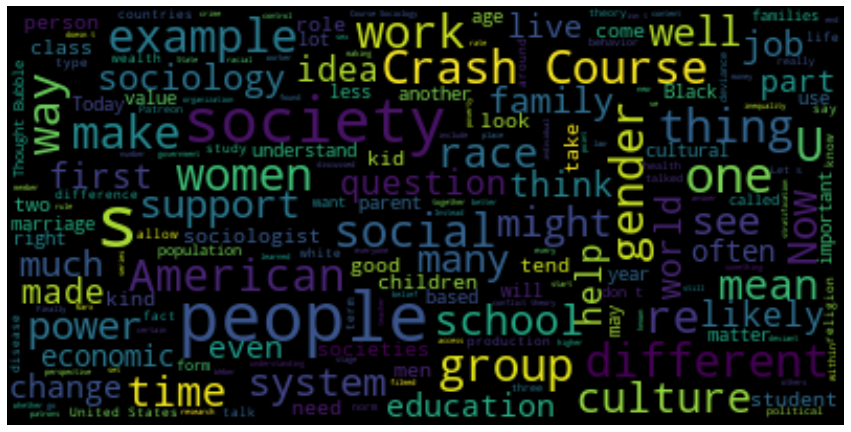

In [18]:
%matplotlib inline
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(df['caption'].values)

wordcloud = WordCloud(max_font_size=36).generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Other data

If you want other YouTube data, such as the list of videos that will autoplay or from a specific user, things get more complicated. There might be a Python library available, but most likely you will have to write your own web scraper using [Selenium](https://selenium-python.readthedocs.io) to control your browser. You'll also have to use a [different library](https://docs.livestreamer.io/api_guide.html), or build you own solution, to caputre livestreams. 